# Antonio Rafael Cedillo A012656823
## Actividad evaluable: Patrones con Kmeans

## Covid-19 Tweets

### Autores:
- Moisés Adame Aguilar (A01660927)
- Luis Armando Mandujano Chávez (A01655899)
- Antonio Rafael Cedillo Ródriguez (A01656823)

## Actividad Previa (12 septiembre)
### Primer uso e implementación de kmeans y matplotlib

1. Importar pandas (opcional darle un "apodo" como pd) y leer el csv "covid19_tweets" para  crear un data frame e imprimirlo para checar que todo este en orden.

In [75]:
import pandas as pd

df = pd.read_csv("covid19_tweets.csv")
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspective...,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App,False
74434,M0ser,NaN,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False


2. Importar las librerias sklearn, cluster, matplotlib, pyplot y numpy. Cada una tiene una función especifica para el uso de Kmeans.

    -Sklearn, cluster: De estas libreruas se importa especificamente el modulo Kmeans, este para la creación y calculos relacionados a los clusters.

    - Matplotlib, pyplot: Se usa para crear la grafica, con colores y labels. 

    -Numpy: Se usa para la convertir los datos de las tablas en un arreglo


Para este analisis, veremos si hay alugna relación entre los seguidores y amigos de todos los seguidores de la plataforma X/Twitter. 
En este ocasión, hacemos 3 clusters. Igualmente hacemos creamos una lista de user followers y friends. Posteriormente convertimos la lista en un array y hacemos la operación de Kmeans fit para usar estos datos para la creación de la grafica.

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

n = 3
kM = KMeans(n_clusters=n)

#arreglo de cluster
arr = []
for x in range(len(df["user_followers"])):
    arr.append([df["user_followers"][x],df["user_friends"][x]])



fitArr = np.array(arr)
kM.fit(fitArr)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

3. Crear la grafica

Se crea la grafica haciendo los calculos de los centros de los clusters con el uso de la la variable de kM (k means), despues hacemos etiquetas para cada grupo y para cada centroide. 

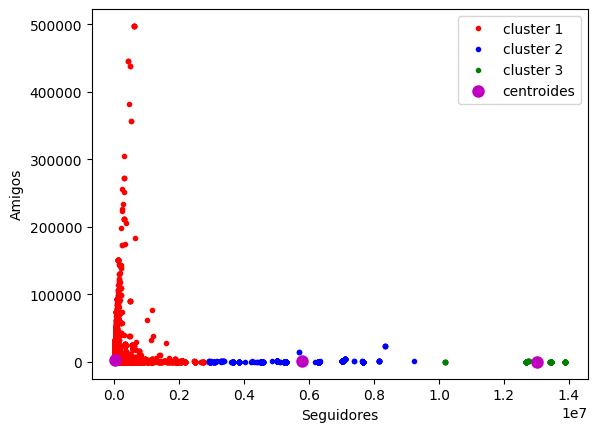

In [77]:
centroides = kM.cluster_centers_
etiquetas = kM.labels_


plt.plot(fitArr[etiquetas==0,0],fitArr[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(fitArr[etiquetas==1,0],fitArr[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(fitArr[etiquetas==2,0],fitArr[etiquetas==2,1],'g.', label='cluster 3')

plt.xlabel("Seguidores")
plt.ylabel("Amigos")

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()


## Tarea: Patrones con KMeans.

En base a lo realizado anteriormente, podemos hacer las siguientes modificaciones para determinar el valor optimo de n o k.

### Primer opción: Aumentar el valor de k o n.

In [78]:
n = 4
kM = KMeans(n_clusters=n)

#arreglo de cluster
arr = []
for x in range(len(df["user_followers"])):
    arr.append([df["user_followers"][x],df["user_friends"][x]])



fitArr = np.array(arr)
kM.fit(fitArr)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

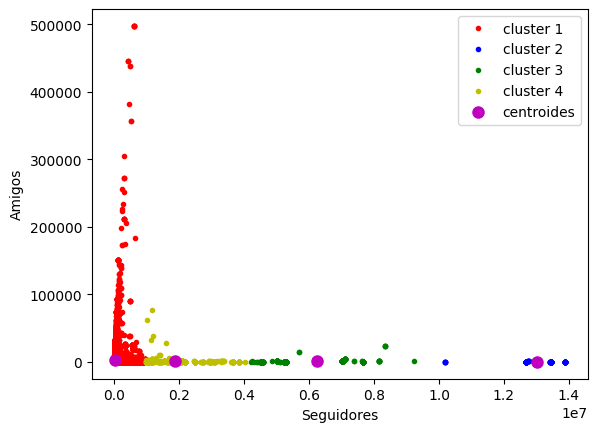

In [79]:
centroides = kM.cluster_centers_
etiquetas = kM.labels_


plt.plot(fitArr[etiquetas==0,0],fitArr[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(fitArr[etiquetas==1,0],fitArr[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(fitArr[etiquetas==2,0],fitArr[etiquetas==2,1],'g.', label='cluster 3')
plt.plot(fitArr[etiquetas==3,0],fitArr[etiquetas==3,1],'y.', label='cluster 4')


plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.xlabel("Seguidores")
plt.ylabel("Amigos")

plt.legend(loc='best')
plt.show()

En este caso podemos ver que n o k = 4 no es rentable gracias a que no se forman 4 clusters, si no que la cantidad de integrantes en el  cluster 1 se reduce y la presencia del cluster 3 es mucho menor. Entonces de n = 3 y n = 4 podemos intuir que es mejor una cantidad menor, ya que en el caso de n = 3, el ultimo cluster no esta tan presente. 

### Segunda opción: Disminución el valor de k o n.

In [80]:
n = 2
kM = KMeans(n_clusters=n)

#arreglo de cluster
arr = []
for x in range(len(df["user_followers"])):
    arr.append([df["user_followers"][x],df["user_friends"][x]])



fitArr = np.array(arr)
kM.fit(fitArr)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

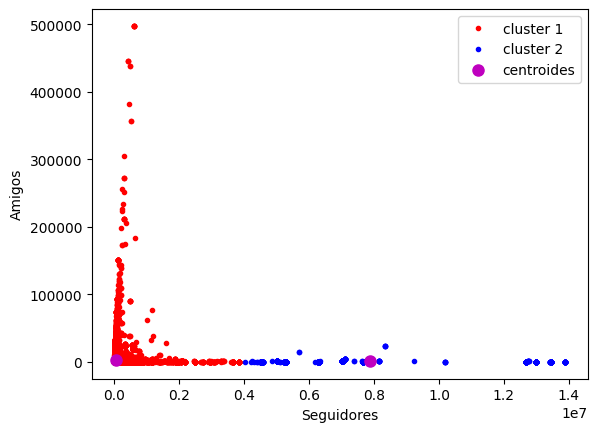

In [81]:
centroides = kM.cluster_centers_
etiquetas = kM.labels_


plt.plot(fitArr[etiquetas==0,0],fitArr[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(fitArr[etiquetas==1,0],fitArr[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.xlabel("Seguidores")
plt.ylabel("Amigos")

plt.legend(loc='best')
plt.show()

Aqui podemos ver que k/n = 2 es mas optimo, ya que la cantidad de centroides se reduce y  vemos la distribución de los "miembros" entre los grupos mas equilibrado, igualmente vemos que la cantidad de centroides se reduce. 

## Opción 3: Obtener de una manera iterada K/n.

En este caso, en vez de hacer varias pruebas aumentando o disminuyendo el valor de K y determinando poco a poco cada valor. Se puede hacer de la siguiente manera, creando  las graficas en un loop para ver la distribución de los centroides, en este caso evaluaremos los valores del 1 al 20:

Checando con k =  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


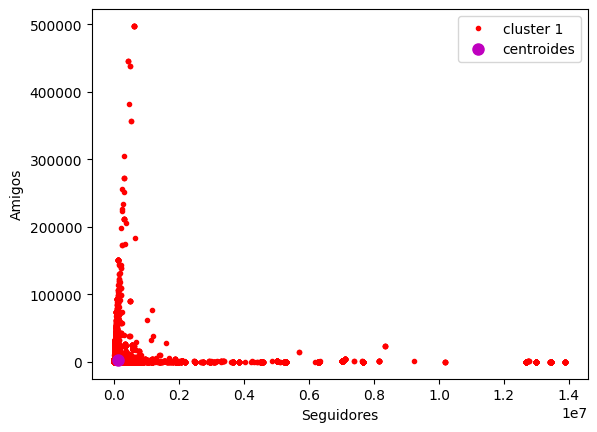

Checando con k =  2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


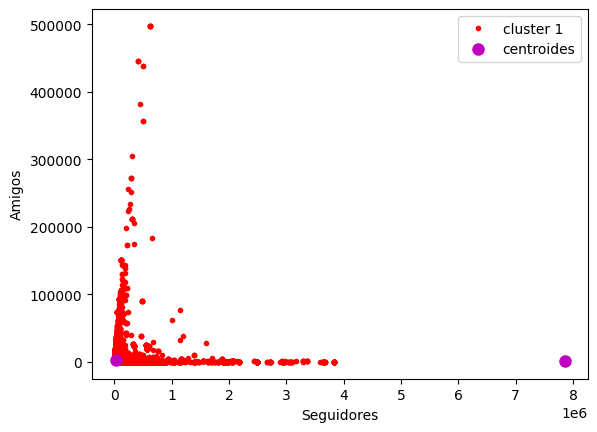

Checando con k =  3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


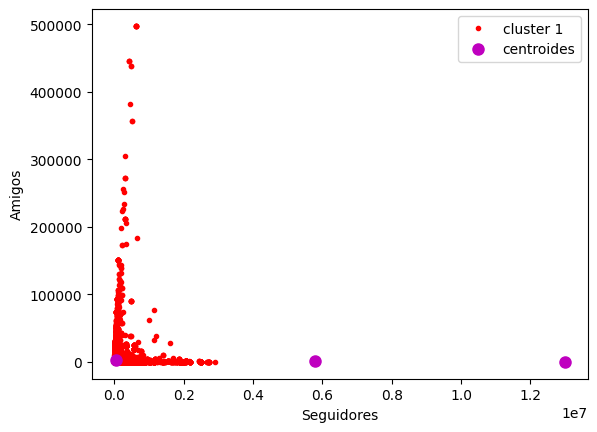

Checando con k =  4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


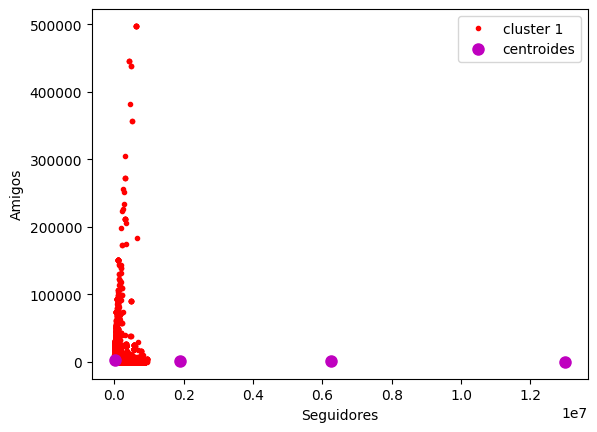

Checando con k =  5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


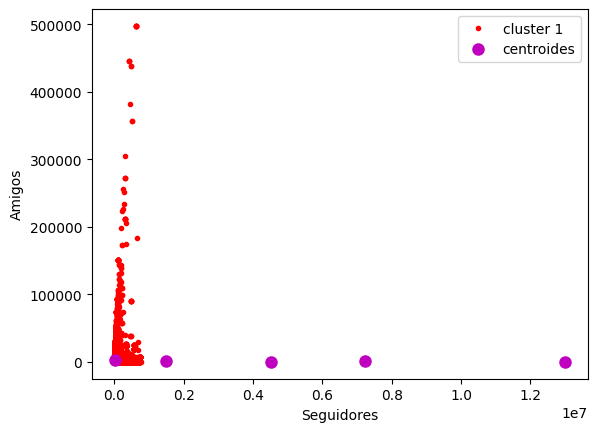

Checando con k =  6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


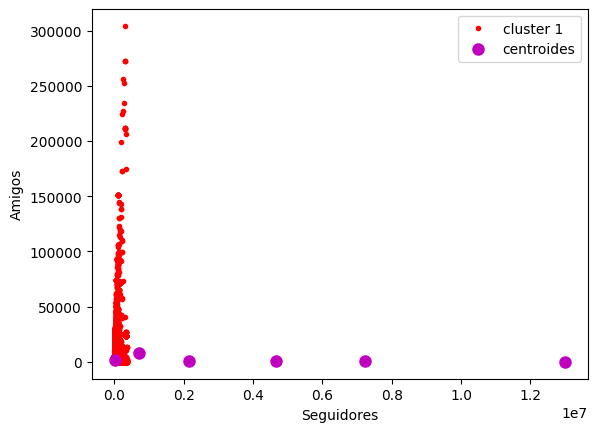

Checando con k =  7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


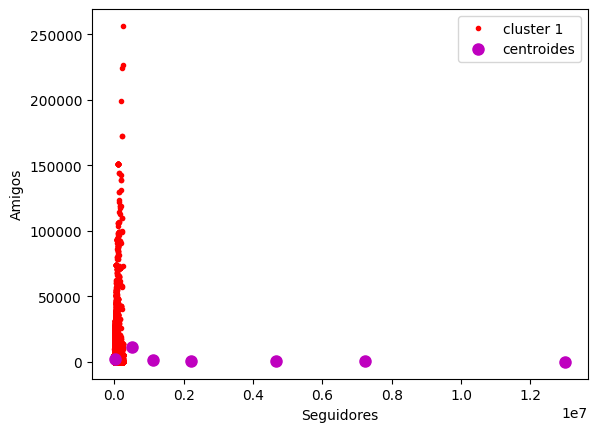

Checando con k =  8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


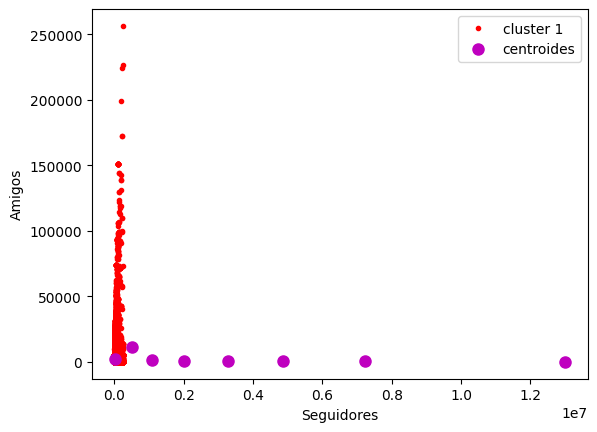

Checando con k =  9


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


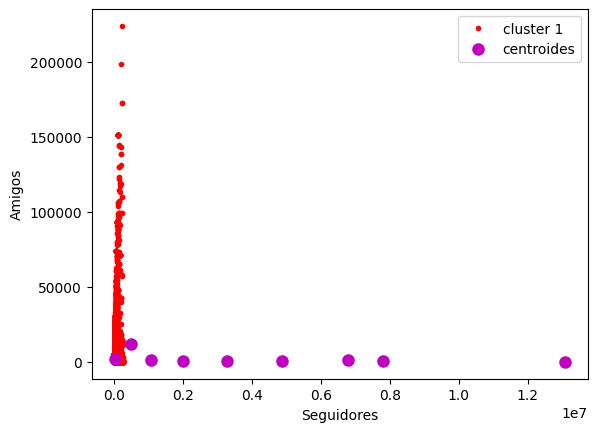

Checando con k =  10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


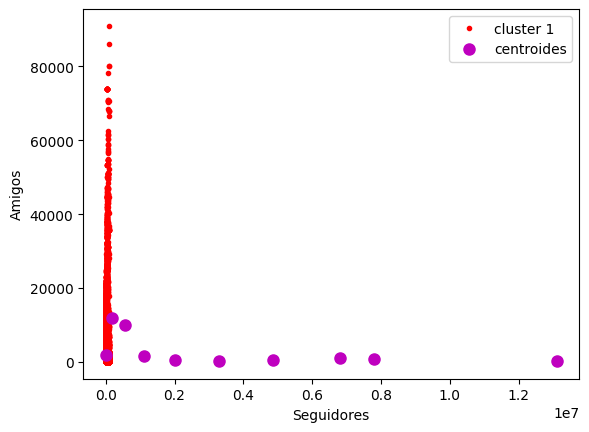

Checando con k =  11


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


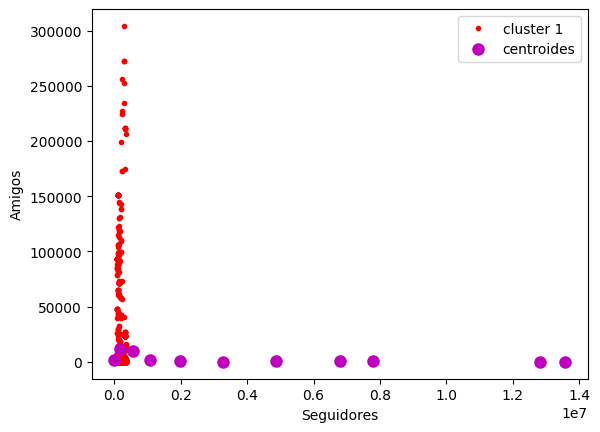

Checando con k =  12


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


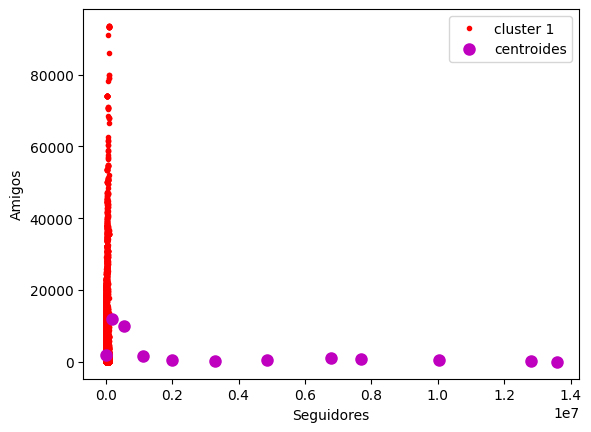

Checando con k =  13


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


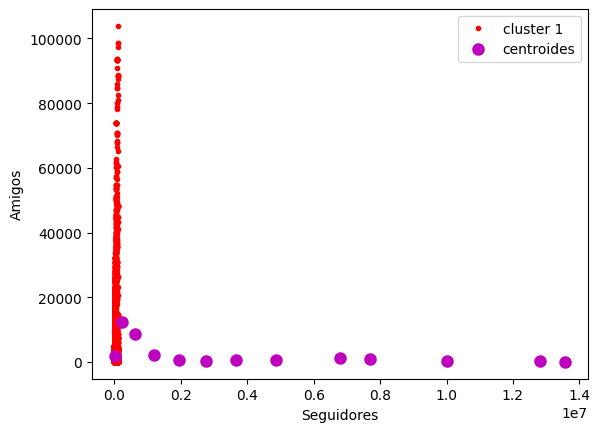

Checando con k =  14


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


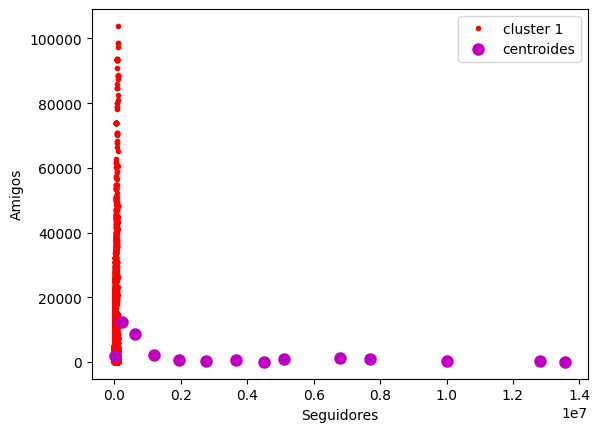

Checando con k =  15


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


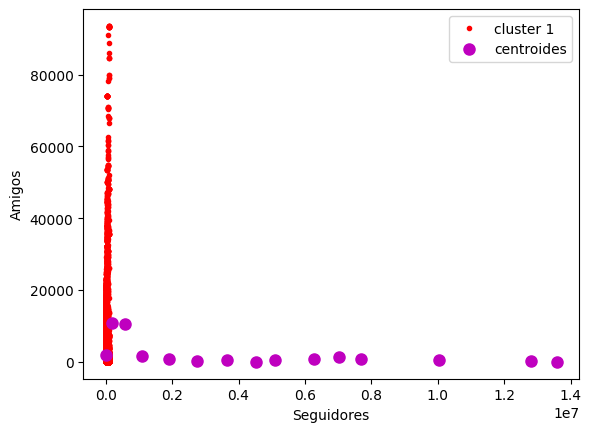

Checando con k =  16


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


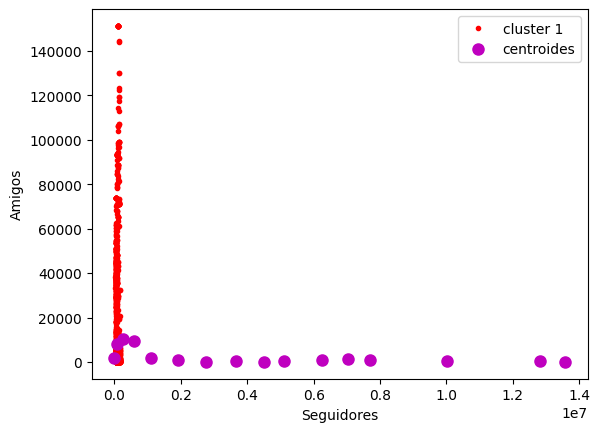

Checando con k =  17


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


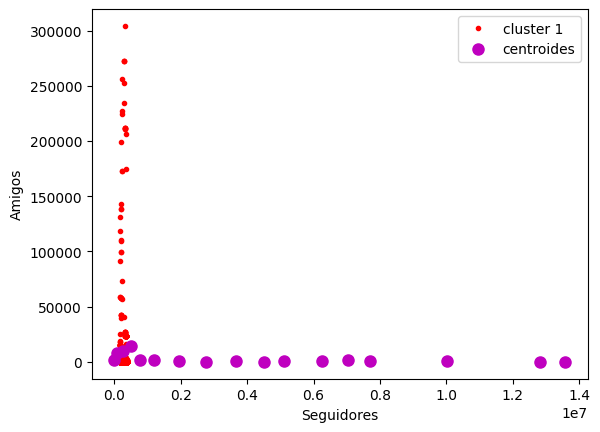

Checando con k =  18


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


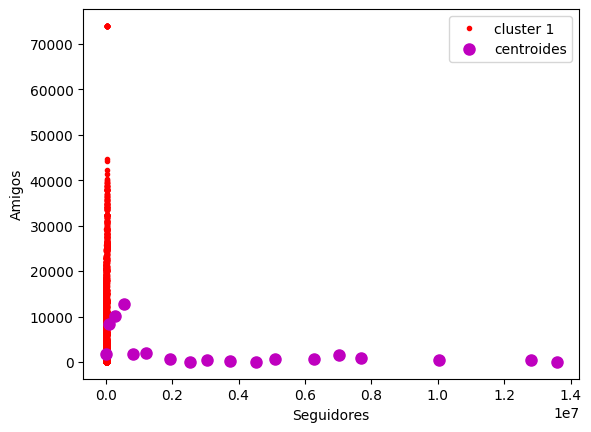

Checando con k =  19


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


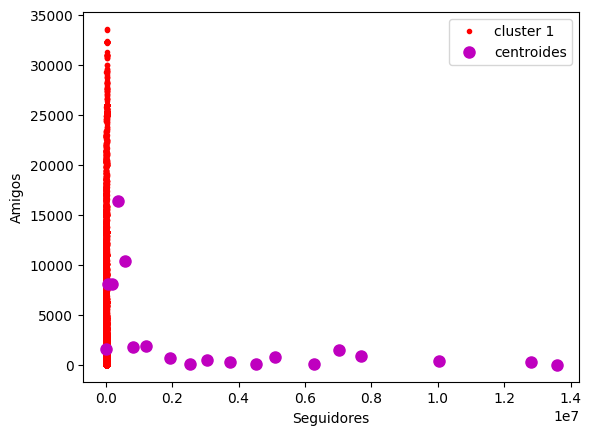

In [82]:
def obtenerK(k):
    
    arr = []
    for x in range(len(df["user_followers"])):
        arr.append([df["user_followers"][x],df["user_friends"][x]])



    
    for numero in range(1,k):
        print("Checando con k =  " + str(numero))
        
        n = numero
        kM = KMeans(n_clusters=n)


        fitArr = np.array(arr)
        kM.fit(fitArr)

        centroides = kM.cluster_centers_
        etiquetas = kM.labels_


        plt.plot(fitArr[etiquetas==0,0],fitArr[etiquetas==0,1],'r.', label='cluster 1')
        plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

        plt.xlabel("Seguidores")
        plt.ylabel("Amigos")

        plt.legend(loc='best')
        plt.show()


obtenerK(20)

En este caso podemos ver que el  k optimo puede ser = 2 o 3, en este caso no es necesario volverlos a hacer 

In [83]:
#Creando la grafica con la K optima

# Respondiendo las preguntas

1. ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Puede ser que estos centros son los que comparten mas caracteristicas entre tener cierta cantidad de seguidores con cierta cantidad de amigos. Por que siento que todos se mantienen en la misma posición, solamente que al agregar mas clusters, el nuevo va adaptandose y agarrando lugares vacios de la grafica. 

2. ¿Como obtuviste el valor de k o n a usar?

Hice uso de dos formas para obtener K (o n). La primera es incrementar/disminuir de 1 a 1 el valor de K y determinarlo con el analisis de cada grafica, siendo la presencia de cada cluster y la distancia de cada centroide.

3. ¡Los centros serian mas representativos si usaras un valor mas alto? ¡Mas bajo?

La mejor opción es buscar un valor optimo, donde todos los centros no esten apretados entre si. En este caso, parece ser que un valor menor, entre 2 o 3 da valores mas representativos, ya que si hay una distancia significativa entre todos los clusters. 

4. ¿Que distancia tienen los centros entre si? ¿Hay alguno que este muy cercano a otros?

Dependiendo del numero de clusters. Pero en el caso de 2 o 3 clusters, si hay una distancia de a lo menos 0.6*1e6 (en el caso de 3 clusters). mientras mas clusters se agregen, hay una menor distancia.

5. ¿Que pasaría con los centros si tuvieramos muchos outliers en el analisis de cajas y bigotes?

En este caso, antes de poder responder la pregunta, es necesario hacer una grafica de cajas y bigotes de los seguidores y amigos respectivamente, este con el uso de la libreria seaborn (puedes ponerle un "apodo" opcional). En el caso de que hubiera muchos outliers, podriamos ver que habria ciertos usuarios con muchos amigos y pocos seguidores o viceversa.

<Axes: >

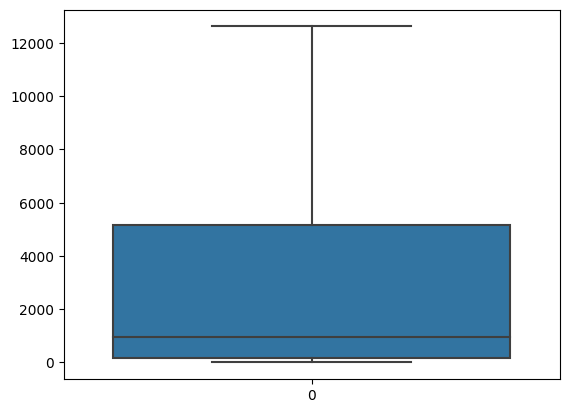

In [84]:
#Caja/Bigotes de followers
import seaborn as sb

sb.boxplot(data = df["user_followers"],showfliers=False)

<Axes: >

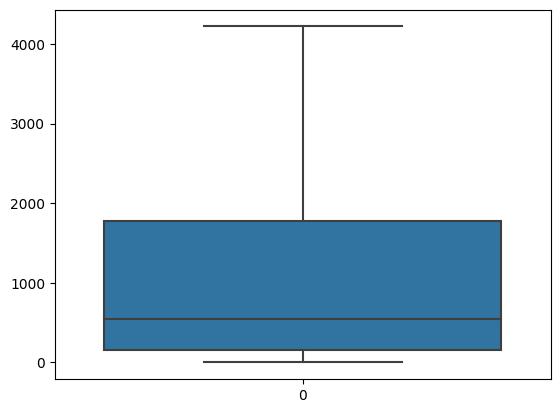

In [85]:
#Caja/Bigotes de followers

sb.boxplot(data = df["user_friends"],showfliers=False)

6. ¿Que puedes decir de los datos basandose en los centros? 

Pues podems ver que la diferencia en cada usuario entre los amigos y seguidores no son tan grandes, por supuesto, la que mas diferencia hay son en el caso de influencers, que tienen muchos seguidores, pero en este caso, tienen muchos amigos tambien.